In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [43]:
import pathlib
data=pathlib.Path("20mag2")

In [44]:
data

WindowsPath('20mag2')

In [45]:
list(data.glob('*/*.png'))

[WindowsPath('20mag2/hl/image0001_h1_0.png'),
 WindowsPath('20mag2/hl/image0001_h1_1.png'),
 WindowsPath('20mag2/hl/image0001_h1_2.png'),
 WindowsPath('20mag2/hl/image0001_h1_3.png'),
 WindowsPath('20mag2/hl/image0002_h1_0.png'),
 WindowsPath('20mag2/hl/image0002_h1_1.png'),
 WindowsPath('20mag2/hl/image0002_h1_2.png'),
 WindowsPath('20mag2/hl/image0002_h1_3.png'),
 WindowsPath('20mag2/hl/image0003_h1_0.png'),
 WindowsPath('20mag2/hl/image0003_h1_1.png'),
 WindowsPath('20mag2/hl/image0003_h1_2.png'),
 WindowsPath('20mag2/hl/image0003_h1_3.png'),
 WindowsPath('20mag2/hl/image0004_h1_0.png'),
 WindowsPath('20mag2/hl/image0004_h1_1.png'),
 WindowsPath('20mag2/hl/image0004_h1_2.png'),
 WindowsPath('20mag2/hl/image0004_h1_3.png'),
 WindowsPath('20mag2/hl/image0005_h1_0.png'),
 WindowsPath('20mag2/hl/image0005_h1_1.png'),
 WindowsPath('20mag2/hl/image0005_h1_2.png'),
 WindowsPath('20mag2/hl/image0005_h1_3.png'),
 WindowsPath('20mag2/hl/image0006_h1_0.png'),
 WindowsPath('20mag2/hl/image0006_

In [46]:
count=len(list(data.glob('*/*.png')))

In [47]:
count

508

In [48]:
iron_ore_images_dict = {
    'hard laminated ore': list(data.glob('hl/*')),
    'lateritic ore': list(data.glob('ll/*')),
    'soft laminated ore': list(data.glob('sl/*')),
  
}

In [49]:
iron_ore_labels_dict = {
    'hard laminated ore': 0,
    'lateritic ore': 1,
    'soft laminated ore': 2,
    
}

In [50]:
iron_ore_images_dict['hard laminated ore'][0]

WindowsPath('20mag2/hl/image0001_h1_0.png')

In [51]:
img = cv2.imread(str(iron_ore_images_dict['hard laminated ore'][0]))

In [52]:
img.shape

(769, 1024, 3)

In [53]:
cv2.resize(img,(128,128)).shape

(128, 128, 3)

In [54]:
X, y = [], []

for iron_ore_name, images in iron_ore_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(iron_ore_labels_dict[iron_ore_name])

In [55]:
X = np.array(X)
y = np.array(y)

Train test split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

Preprocessing: scale images

In [57]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [100]:
''''data_augmentation = keras.Sequential(
  [
    #layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)''''

SyntaxError: EOL while scanning string literal (2375063997.py, line 7)

Build convolutional neural network and train it

In [80]:
num_classes = 3

model = Sequential([
  #data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
hist=model.fit(X_train_scaled, y_train, batch_size=16,epochs=20,validation_data = (X_test_scaled, y_test),)    

Epoch 1/20
26/26 [==============================] - 3s 97ms/step - loss: 1.0631 - accuracy: 0.5074 - val_loss: 1.0068 - val_accuracy: 0.7843
Epoch 2/20
26/26 [==============================] - 2s 89ms/step - loss: 0.9841 - accuracy: 0.7537 - val_loss: 0.9566 - val_accuracy: 0.7745
Epoch 3/20
26/26 [==============================] - 2s 91ms/step - loss: 0.9332 - accuracy: 0.8054 - val_loss: 0.9113 - val_accuracy: 0.7843
Epoch 4/20
26/26 [==============================] - 2s 92ms/step - loss: 0.8908 - accuracy: 0.8473 - val_loss: 0.8924 - val_accuracy: 0.7941
Epoch 5/20
26/26 [==============================] - 3s 103ms/step - loss: 0.8738 - accuracy: 0.7980 - val_loss: 0.8603 - val_accuracy: 0.8137
Epoch 6/20
26/26 [==============================] - 2s 92ms/step - loss: 0.8651 - accuracy: 0.7537 - val_loss: 0.8653 - val_accuracy: 0.7353
Epoch 7/20
26/26 [==============================] - 2s 92ms/step - loss: 0.8531 - accuracy: 0.7685 - val_loss: 0.8429 - val_accuracy: 0.6765
Epoch 8/20
2

In [81]:
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 0s 33ms/step - loss: 0.5471 - accuracy: 0.9216


[0.5471374988555908, 0.9215686321258545]

In [82]:
predictions = model.predict(X_test_scaled)
predictions

4/4 [==============================] - 0s 31ms/step


array([[-0.7061757 , -0.41849864,  0.6964506 ],
       [-0.705824  , -0.41863623,  0.69636387],
       [-0.6879922 ,  0.78664887, -0.6793877 ],
       [-0.70390195, -0.39347613,  0.6666086 ],
       [ 0.7217647 , -0.630186  , -0.04786596],
       [ 0.72186804, -0.63020134, -0.04791982],
       [-0.68800116,  0.78649384, -0.6792079 ],
       [-0.6880027 ,  0.7852712 , -0.6778195 ],
       [-0.6880182 ,  0.7852393 , -0.67777646],
       [ 0.7218629 , -0.6302006 , -0.04791719],
       [-0.68803567,  0.78306115, -0.6752967 ],
       [-0.6880415 ,  0.78300315, -0.6752284 ],
       [-0.70258355, -0.41912186,  0.6946794 ],
       [-0.7057421 , -0.41865045,  0.69632256],
       [ 0.72186446, -0.63020086, -0.04791795],
       [-0.6879894 ,  0.7866975 , -0.67944384],
       [-0.68799555,  0.786614  , -0.6793466 ],
       [-0.6880446 ,  0.78278476, -0.6749783 ],
       [-0.6879956 ,  0.78645295, -0.67916346],
       [ 0.72186804, -0.63020134, -0.04791985],
       [-0.534364  , -0.44404918,  0.606

In [83]:
score = tf.nn.softmax(predictions[20])
print(score)

tf.Tensor([0.19136922 0.2094572  0.59917355], shape=(3,), dtype=float32)


In [84]:
np.argmax(score)

2

In [85]:
y_test[20]

2

In [86]:
# Plot the loss and accuracy curves for training and validation 



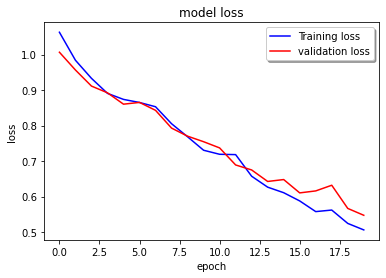

In [87]:


plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="validation loss")
plt.legend(loc='best', shadow=True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



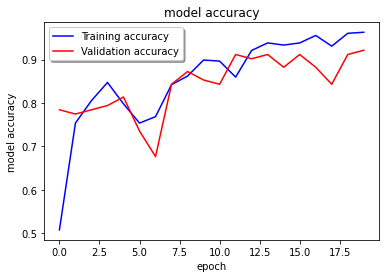

In [88]:
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('model accuracy')
plt.show()

In [89]:
#Make predictions
y_probs = model.predict(X_test_scaled)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

4/4 [==============================] - 0s 31ms/step


In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

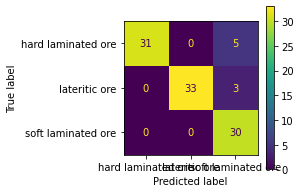

In [91]:
#Confusion matrix
cm=confusion_matrix(y_preds,y_test)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=iron_ore_images_dict)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

In [92]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)      

In [93]:
#Make predictions
y_probs = model.predict(X_test_scaled)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_preds))

4/4 [==============================] - 0s 31ms/step
Confusion Matrix
[[31  0  0]
 [ 0 33  0]
 [ 5  3 30]]


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds, target_names=iron_ore_labels_dict))

                    precision    recall  f1-score   support

hard laminated ore       0.86      1.00      0.93        31
     lateritic ore       0.92      1.00      0.96        33
soft laminated ore       1.00      0.79      0.88        38

          accuracy                           0.92       102
         macro avg       0.93      0.93      0.92       102
      weighted avg       0.93      0.92      0.92       102

